In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heart.csv")

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
x=data.drop("target",axis=1)
y=data["target"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2 ,random_state=42)
model=RandomForestClassifier(n_estimators=100,random_state=2)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [ ]:
print(f'Accuracy:{accuracy_score(y_test,y_pred)*100}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test,y_pred)}')
print(f'Classification Report:\n{classification_report(y_test,y_pred)}')

Accuracy:98.53658536585365
Confusion Matrix:
[[102   0]
 [  3 100]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



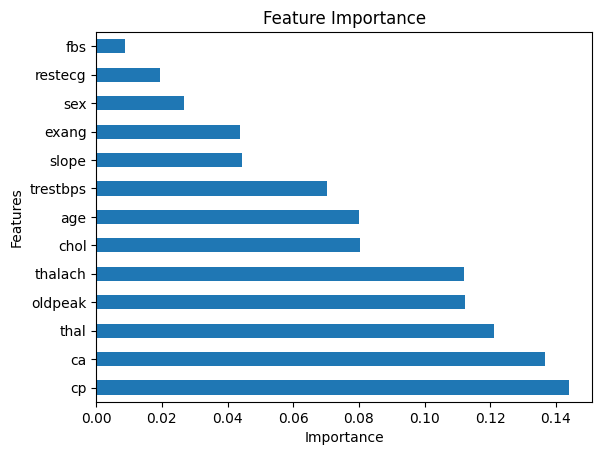

In [ ]:
#feature selection
feature_importance=pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_importance.plot(kind='barh')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

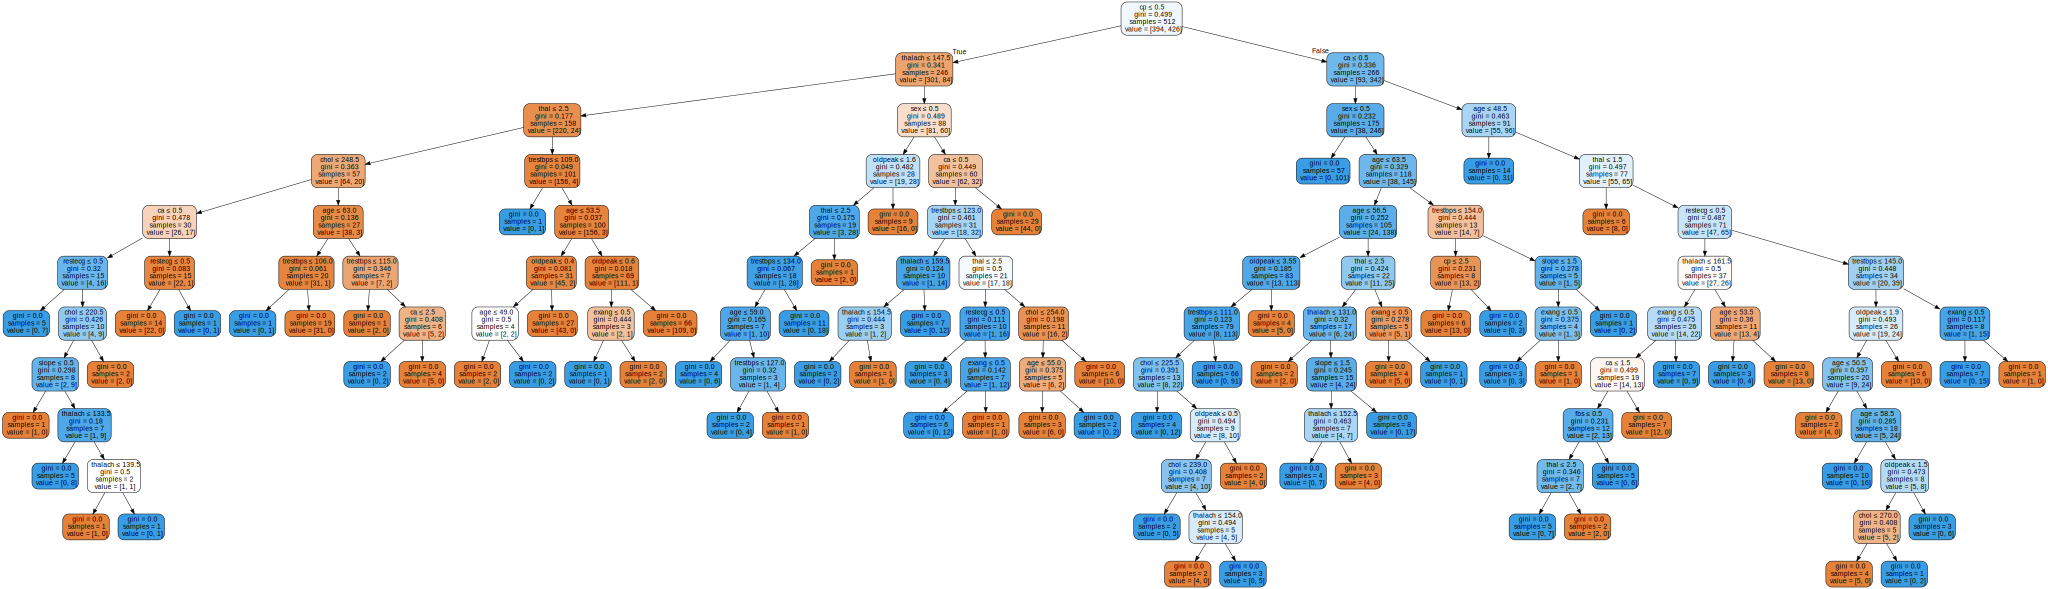

In [ ]:
from sklearn.tree import  export_graphviz
import graphviz
tree=model.estimators_[0]
dot_data=export_graphviz(model.estimators_[0],out_file=None,feature_names=x.columns,filled=True,rounded=True,special_characters=True)
graph=graphviz.Source(dot_data)
graph.render("heart_disease")
graph

In [ ]:
import seaborn as sns

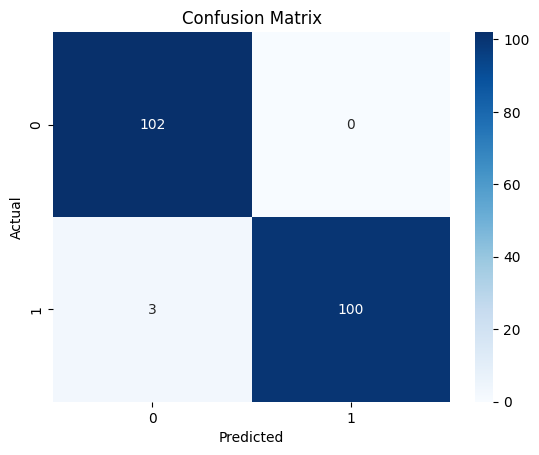

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()